In [1]:
!pip install ultralytics==8.0.196
!pip install roboflow
!pip install pytesseract
!apt-get update
!apt-get install -y tesseract-ocr
!apt-get install -y tesseract-ocr-ara  # Install Arabic language support

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 631.1/631.1 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 1.1 MB/s eta 0:00:00
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Ign:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Hit:7 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,251 kB]
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ub

# 1. Model To Detect objects

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="PaIk6y4dQo19iKXiPEzC")
project = rf.workspace("elsoudy").project("card-hleyg")
version = project.version(1)
dataset = version.download("yolov8", "datasets/card-1")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to datasets/card-1 in yolov8:: 100%|██████████| 3323/3323 [00:01<00:00, 2457.29it/s]


In [ ]:
#!yolo mode=train task=detect model=yolov8n.pt data='/content/datasets/card-1/data.yaml' epochs=30 imgsz=640 batch=32 lr0=0.005

100% 6.23M/6.23M [00:00<00:00, 347MB/s]
/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(

In [ ]:
from ultralytics import YOLO

# Load the trained model from the specific run
model = YOLO('"/content/runs/detect/train/weights/best.pt"')
# Evaluate on the validation dataset
results = model.val()

# Print summary metrics
print(f"Precision: {results.box.mp:.4f}")  # Mean Precision
print(f"Recall: {results.box.mr:.4f}")     # Mean Recall
print(f"mAP@50: {results.box.map50:.4f}")  # Mean Average Precision at IoU 0.5
print(f"mAP@50-95: {results.box.map:.4f}") # Mean Average Precision at IoU 0.5:0.95

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.4.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3008573 parameters, 0 gradients, 8.1 GFLOPs
100%|██████████| 755k/755k [00:00<00:00, 21.3MB/s]
val: Scanning /content/datasets/card-1/valid/labels... 127 images, 0 backgrounds, 0 corrupt: 100%|██████████| 127/127 [00:00<00:00, 1315.10it/s]
val: New cache created: /content/datasets/card-1/valid/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:41<00:00,  5.20s/it]
                   all        127       1104      0.955      0.956      0.981      0.622
                  Add1        127        120      0.958      0.967      0.982      0.627
                  Add2        127        120       0.97      0.958       0.99      0.658
                  Ex_d        127         46          1      0.892       0.99      0.512
                  Ex_m        127         46      0.999      0.761      0.968   

Precision: 0.9550
Recall: 0.9557
mAP@50: 0.9812
mAP@50-95: 0.6218


# 2. Model To Detect ID Numbers

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="PaIk6y4dQo19iKXiPEzC")
project = rf.workspace("egyptian-ids").project("arabic-numbers-vmdt0")
version = project.version(2)
dataset = version.download("yolov8", "datasets/arabic-numbers-2")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to datasets/arabic-numbers-2 in yolov8:: 100%|██████████| 3602/3602 [00:01<00:00, 1945.46it/s]


In [ ]:
#!yolo task=detect mode=train model=yolov8s.pt data='/content/datasets/arabic-numbers-2/data.yaml' epochs=20 imgsz=640

100% 21.5M/21.5M [00:00<00:00, 475MB/s]
/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(

In [ ]:
from ultralytics import YOLO

# Load the trained model from the specific run
model = YOLO('"/content/runs/detect/train2/weights/best.pt"')
# Evaluate on the validation dataset
results = model.val()

# Print summary metrics
print(f"Precision: {results.box.mp:.4f}")  # Mean Precision
print(f"Recall: {results.box.mr:.4f}")     # Mean Recall
print(f"mAP@50: {results.box.map50:.4f}")  # Mean Average Precision at IoU 0.5
print(f"mAP@50-95: {results.box.map:.4f}") # Mean Average Precision at IoU 0.5:0.95


You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.4.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11129454 parameters, 0 g

Precision: 0.9876
Recall: 0.9956
mAP@50: 0.9925
mAP@50-95: 0.7553


# 3. Model To Detect ID Card

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="PaIk6y4dQo19iKXiPEzC")
project = rf.workspace("iddetection-zr0sa").project("national-id-ltfb6")
version = project.version(7)
dataset = version.download("yolov8", "datasets/national-id-7")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to datasets/national-id-7 in yolov8:: 100%|██████████| 3874/3874 [00:01<00:00, 2978.89it/s]


In [ ]:
#!yolo task=detect mode=train model=yolov8s.pt data='/content/datasets/national-id-7/data.yaml' epochs=40 imgsz=640

/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu'), file  # load


In [ ]:
from ultralytics import YOLO

# Load the trained model from the specific run
model = YOLO('"/content/runs/detect/train3/weights/best.pt"')
# Evaluate on the validation dataset
results = model.val()

# Print summary metrics
print(f"Precision: {results.box.mp:.4f}")  # Mean Precision
print(f"Recall: {results.box.mr:.4f}")     # Mean Recall
print(f"mAP@50: {results.box.map50:.4f}")  # Mean Average Precision at IoU 0.5
print(f"mAP@50-95: {results.box.map:.4f}") # Mean Average Precision at IoU 0.5:0.95


Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.4.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3007208 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/National-ID-7/valid/labels... 172 images, 0 backgrounds, 0 corrupt: 100%|██████████| 172/172 [00:00<00:00, 1504.82it/s]
val: New cache created: /content/National-ID-7/valid/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:54<00:00,  4.99s/it]
                   all        172        201      0.975      0.979      0.994      0.949
           back-bottom        172         10      0.901      0.909      0.986      0.946
             back-left        172         12      0.992          1      0.995      0.931
            back-right        172         14          1      0.937      0.995       0.96
               back-up        172         57          1      0.984      0.995      0.947
          front-bottom        172         18

Precision: 0.9754
Recall: 0.9787
mAP@50: 0.9939
mAP@50-95: 0.9489


# Copy the best weights

In [2]:
!cp "/content/runs/detect/train/weights/best.pt" "/content/detect_info.pt"
!cp "/content/runs/detect/train2/weights/best.pt" "/content/detect_arabic_numbers.pt"
!cp "/content/runs/detect/train3/weights/best.pt" "/content/detect_id_card.pt"

cp: cannot stat '/content/runs/detect/train/weights/best.pt': No such file or directory
cp: cannot stat '/content/runs/detect/train2/weights/best.pt': No such file or directory
cp: cannot stat '/content/runs/detect/train3/weights/best.pt': No such file or directory


# Import all the necessary libraries

In [4]:
from ultralytics import YOLO
from IPython.display import display, Image
import cv2
import pytesseract
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import re
from google.colab import files
import numpy as np
from PIL import Image as PILImage

# The main OCR Functions

# front interface

Saving 55.jpg to 55.jpg


/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu'), file  # load


Detected Class: front-up
image doesn't need to rotate: front-up


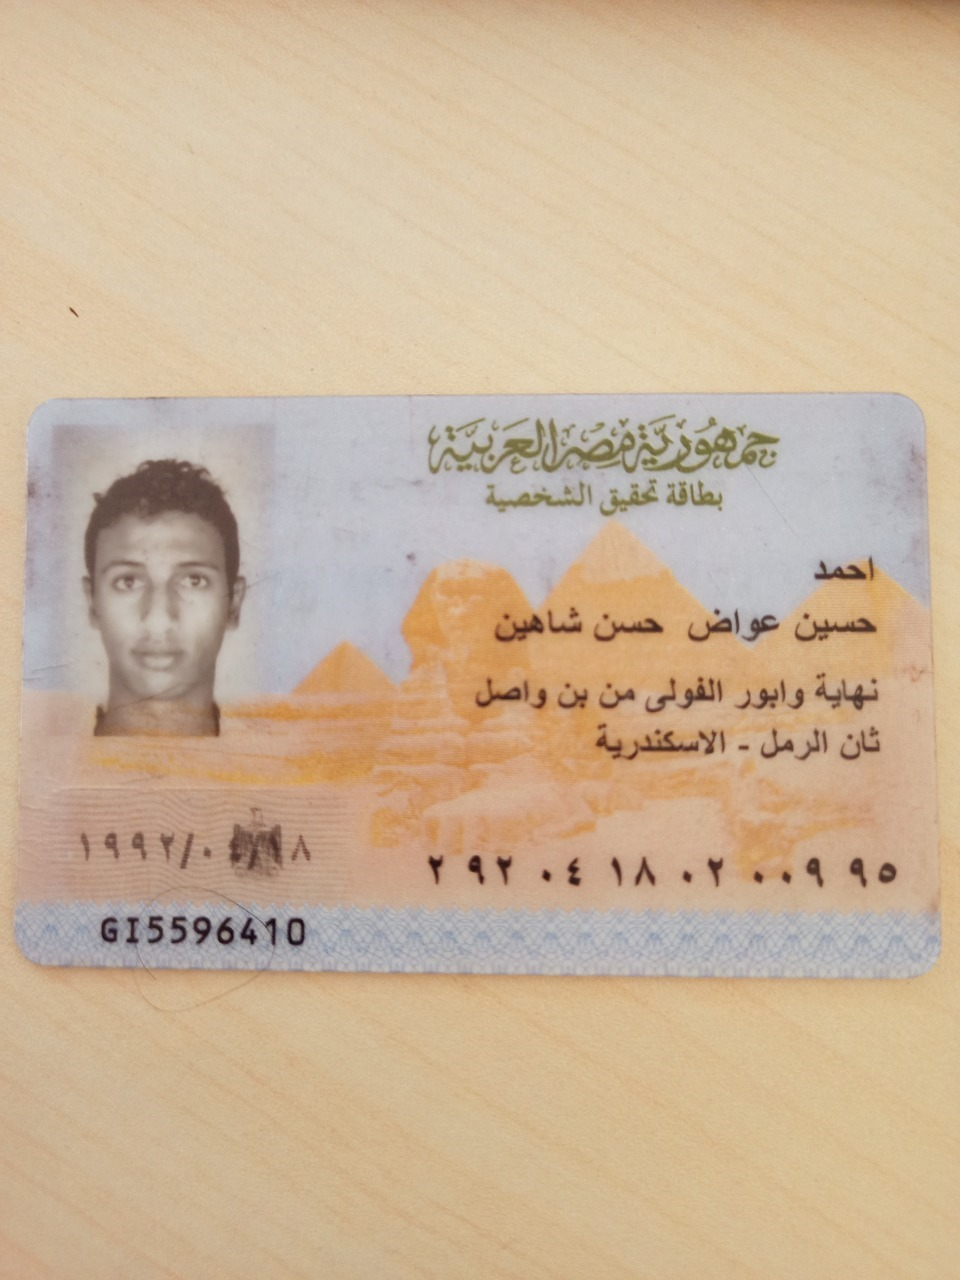

/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu'), file  # load


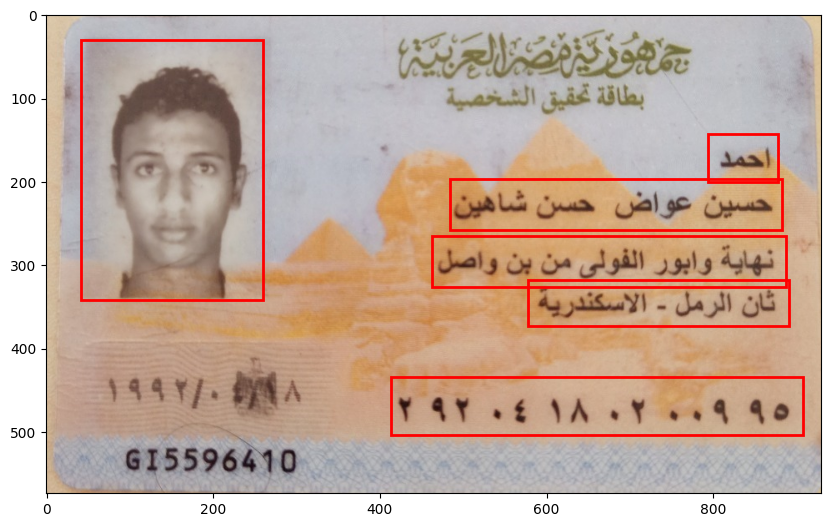

/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu'), file  # load


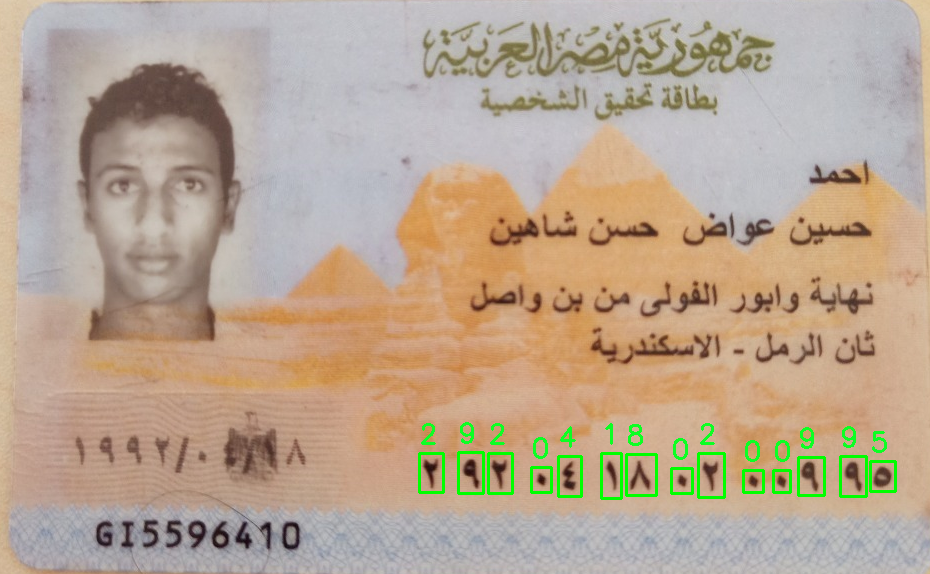

First Name: احمد
Second Name: حسين عواض حسن شاهين
Full Name: احمد حسين عواض حسن شاهين
National ID: 29204180200995
Address1: نهاية وابور الفولى من بن واصل
Address2: ثان الرمل - الاسكندرية
Birth Date: 1992-04-18
Governorate: Alexandria
Gender: Male


In [5]:
# Function to preprocess the cropped image
def preprocess_image(cropped_image):
    gray = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)
    _, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    return binary

# Functions for specific fields with custom OCR configurations
def extract_text(image, bbox, lang='ara'):
    x1, y1, x2, y2 = bbox
    cropped_image = image[y1:y2, x1:x2]
    preprocessed_image = preprocess_image(cropped_image)
    custom_config = r'--oem 3 --psm 6'
    text = pytesseract.image_to_string(preprocessed_image, lang=lang, config=custom_config)
    return text.strip()

# Function to detect national ID numbers in a cropped image
def detect_national_id(cropped_image):
    model = YOLO('/content/detect_arabic_numbers.pt')  # Load the model directly in the function
    results = model(cropped_image)
    detected_info = []

    for result in results:
        for box in result.boxes:
            cls = int(box.cls)
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            detected_info.append((cls, x1))
            cv2.rectangle(cropped_image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(cropped_image, str(cls), (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

    detected_info.sort(key=lambda x: x[1])
    id_number = ''.join([str(cls) for cls, _ in detected_info])

    cv2_imshow(cropped_image)
    return id_number

# Function to remove numbers from a string
def remove_numbers(text):
    return re.sub(r'\d+', '', text)

# Function to plot image with bounding boxes
def plot_image_with_boxes(image, boxes):
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax = plt.gca()
    for box in boxes:
        x1, y1, x2, y2 = [int(coord) for coord in box]
        rect = plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, color='red', linewidth=2)
        ax.add_patch(rect)
    plt.show()

# Function to expand bounding box height only
def expand_bbox_height(bbox, scale=1.2, image_shape=None):
    x1, y1, x2, y2 = bbox
    width = x2 - x1
    height = y2 - y1
    center_x = x1 + width // 2
    center_y = y1 + height // 2
    new_height = int(height * scale)
    new_y1 = max(center_y - new_height // 2, 0)
    new_y2 = min(center_y + new_height // 2, image_shape[0])
    return [x1, new_y1, x2, new_y2]

# Function to process the cropped image
def process_image(cropped_image):
    # Load the trained YOLO model for objects (fields) detection
    model = YOLO('/content/detect_info.pt')
    results = model(cropped_image)

    # Variables to store extracted values
    first_name = ''
    second_name = ''
    merged_name = ''
    nid = ''
    address1 = ''
    address2 = ''

    # Loop through the results
    for result in results:
        # result.show()  # Shows the image with bounding boxes
        # output_path = '/content/d2.jpg'
        # result.save(output_path)
        # display(Image(filename=output_path))

        boxes = [box.xyxy[0].tolist() for box in result.boxes]
        plot_image_with_boxes(cropped_image, boxes)

        for box in result.boxes:
            bbox = box.xyxy[0].tolist()
            class_id = int(box.cls[0].item())
            class_name = result.names[class_id]
            bbox = [int(coord) for coord in bbox]

            if class_name == 'FN':
                first_name = extract_text(cropped_image, bbox, lang='ara')
            elif class_name == 'LN':
                second_name = extract_text(cropped_image, bbox, lang='ara')
            elif class_name == 'Add1':
                address1 = extract_text(cropped_image, bbox, lang='ara')
                address1 = remove_numbers(address1)
            elif class_name == 'Add2':
                address2 = extract_text(cropped_image, bbox, lang='ara')
                address2 = remove_numbers(address2)
            elif class_name == 'Id':
                # expanded_bbox = expand_bbox_height(bbox, scale=1.5, image_shape=cropped_image.shape)
                # cropped_nid = cropped_image[expanded_bbox[1]:expanded_bbox[3], expanded_bbox[0]:expanded_bbox[2]]
                # nid = detect_national_id(cropped_nid)
                nid = detect_national_id(cropped_image)

    merged_name = f"{first_name} {second_name}"
    print(f"First Name: {first_name}")
    print(f"Second Name: {second_name}")
    print(f"Full Name: {merged_name}")
    print(f"National ID: {nid}")
    print(f"Address1: {address1}")
    print(f"Address2: {address2}")

    decoded_info = decode_egyptian_id(nid)
    for key, value in decoded_info.items():
        print(f"{key}: {value}")

# Function to decode the Egyptian ID number
def decode_egyptian_id(id_number):
    governorates = {
        '01': 'Cairo',
        '02': 'Alexandria',
        '03': 'Port Said',
        '04': 'Suez',
        '11': 'Damietta',
        '12': 'Dakahlia',
        '13': 'Ash Sharqia',
        '14': 'Kaliobeya',
        '15': 'Kafr El - Sheikh',
        '16': 'Gharbia',
        '17': 'Monoufia',
        '18': 'El Beheira',
        '19': 'Ismailia',
        '21': 'Giza',
        '22': 'Beni Suef',
        '23': 'Fayoum',
        '24': 'El Menia',
        '25': 'Assiut',
        '26': 'Sohag',
        '27': 'Qena',
        '28': 'Aswan',
        '29': 'Luxor',
        '31': 'Red Sea',
        '32': 'New Valley',
        '33': 'Matrouh',
        '34': 'North Sinai',
        '35': 'South Sinai',
        '88': 'Foreign'
    }

    if len(id_number) != 14:
        raise ValueError("ID number must be 14 digits long")

    century_digit = int(id_number[0])
    year = int(id_number[1:3])
    month = int(id_number[3:5])
    day = int(id_number[5:7])
    governorate_code = id_number[7:9]
    gender_code = int(id_number[12:13])

    if century_digit == 2:
        century = "1900-1999"
        full_year = 1900 + year
    elif century_digit == 3:
        century = "2000-2099"
        full_year = 2000 + year
    else:
        raise ValueError("Invalid century digit")

    gender = "Male" if gender_code % 2 != 0 else "Female"
    governorate = governorates.get(governorate_code, "Unknown")
    birth_date = f"{full_year:04d}-{month:02d}-{day:02d}"

    return {
        'Birth Date': birth_date,
        'Governorate': governorate,
        'Gender': gender
    }

# Function to process image rotation before further processing
def process_detected_image(image_path):
    # Load the trained model
    model = YOLO('/content/detect_id_card.pt')

    # Perform inference on the image
    results = model(image_path)

    # Load the original image
    img = PILImage.open(image_path)

    # Initialize variable for rotated image
    rotated_img = img.copy()  # Make a copy of the image

    # Loop through the results
    for result in results:
        # Loop through the detected objects
        for box in result.boxes:
            # Get the class name
            class_name = result.names[box.cls[0].item()]
            print(f"Detected Class: {class_name}")

            # Rotate the image based on the class name
            if class_name == "front-right":
                rotated_img = img.rotate(-90, expand=True)  # Rotate 90 degrees to the right
                print(f"Rotated image 90 degrees to the right for class: {class_name}")
            elif class_name == "front-left":
                rotated_img = img.rotate(90, expand=True)  # Rotate 90 degrees to the left
                print(f"Rotated image 90 degrees to the left for class: {class_name}")
            elif class_name == "front-bottom":
                rotated_img = img.rotate(180, expand=True)  # Rotate 180 degrees
                print(f"Rotated image 180 degrees for class: {class_name}")
            elif class_name == "front-up":
                rotated_img = img.rotate(0, expand=True)  # Rotate 180 degrees
                print(f"image doesn't need to rotate: {class_name}")

    # Convert the PIL image back to OpenCV format
    rotated_image_cv2 = cv2.cvtColor(np.array(rotated_img), cv2.COLOR_RGB2BGR)

    # Display the rotated image
    display(rotated_img)

    return rotated_image_cv2

# Function to detect the ID card and pass it to the existing code
def detect_and_process_id_card(image_path):
    # Process the detected image for rotation
    rotated_image = process_detected_image(image_path)

    # Crop the ID card from the rotated image
    id_card_model = YOLO('/content/detect_id_card.pt')
    id_card_results = id_card_model(rotated_image)

    # Load the original image using OpenCV
    for result in id_card_results:
        for box in result.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])  # Get bounding box coordinates
            cropped_image = rotated_image[y1:y2, x1:x2]

    # Pass the cropped image to the existing processing function
    process_image(cropped_image)

# Example usage: Upload an image from your local device
uploaded = files.upload()  # Upload the image

for filename in uploaded.keys():
    detect_and_process_id_card(filename)  # Use the uploaded image

# back interface

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.



image 1/1 /content/Hanna_ID1 (1).jpg: 544x640 1 back-up, 10.5ms
Speed: 2.5ms preprocess, 10.5ms inference, 1.5ms postprocess per image at shape (1, 3, 544, 640)


Saving Hanna_ID1.jpg to Hanna_ID1 (1).jpg



0: 448x640 1 Gender, 1 Id, 1 Job, 1 Marital_status, 6.7ms
Speed: 1.8ms preprocess, 6.7ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)


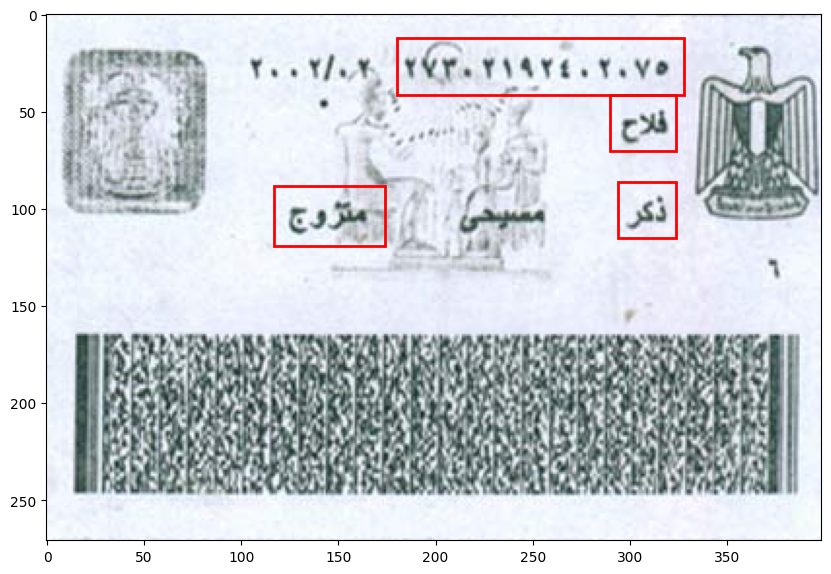

Job: قلاع


In [ ]:
# Load the YOLO models
model_id_card = YOLO('/content/detect_id_card.pt')  # Model for detecting ID cards
model_job = YOLO('/content/detect_info.pt')  # Model for extracting objects field

# Function to extract text using Tesseract OCR
def extract_text(image, bbox, lang='ara'):
    x1, y1, x2, y2 = bbox
    cropped_image = image[y1:y2, x1:x2]

    # Visualize the cropped region to verify it covers the correct area
    cv2_imshow(cropped_image)

    custom_config = r'--oem 3 --psm 6'
    text = pytesseract.image_to_string(cropped_image, lang=lang, config=custom_config)
    return text.strip()

# Function to plot image with bounding boxes
def plot_image_with_boxes(image, boxes):
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax = plt.gca()
    for box in boxes:
        x1, y1, x2, y2 = [int(coord) for coord in box]
        rect = plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, color='red', linewidth=2)
        ax.add_patch(rect)
    plt.show()

# Function to detect ID card using the ID card detection model
def detect_id_card(image_path, model):
    results = model(image_path)
    image = cv2.imread(image_path)

    id_card_bboxes = []
    for result in results:
        # Extract bounding boxes
        id_card_bboxes.extend([box.xyxy[0].tolist() for box in result.boxes])

    return image, id_card_bboxes

# Function to process ID card image and extract job field
def process_image(image_path, model_id_card, model_job):
    # Detect ID card
    image, id_card_bboxes = detect_id_card(image_path, model_id_card)

    # Assuming only one ID card detected, process the first one
    if id_card_bboxes:
        bbox = id_card_bboxes[0]  # Get the first detected ID card bbox

        # Crop the ID card region
        x1, y1, x2, y2 = [int(coord) for coord in bbox]
        id_card_image = image[y1:y2, x1:x2]

        # Use the cropped ID card image as input for the job detection model
        results = model_job(id_card_image)  # Pass the cropped image directly

        # Loop through the results
        job = ''
        for result in results:
            # Extract bounding boxes and class names
            boxes = [box.xyxy[0].tolist() for box in result.boxes]
            plot_image_with_boxes(id_card_image, boxes)  # Use id_card_image for plotting

            # Extract text for the "job" field
            for box in result.boxes:
                bbox = box.xyxy[0].tolist()  # Get bounding box coordinates
                class_id = int(box.cls[0].item())  # Get class ID
                class_name = result.names[class_id]  # Get class name

                # Convert bounding box coordinates to integers
                bbox = [int(coord) for coord in bbox]

                if class_name == 'Job' or class_name == 'Job2':
                    job = extract_text(id_card_image, bbox, lang='ara')

        # Print the extracted value
        print(f"Job: {job}")
    else:
        print("No ID card detected")

# Example usage: Upload an image from your local device
uploaded = files.upload()  # Upload the image
for filename in uploaded.keys():
    process_image(filename, model_id_card, model_job)  # Use the uploaded image